<a href="https://colab.research.google.com/github/techut30/MachineLearning-Assignment-2/blob/main/ML_Assignment_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

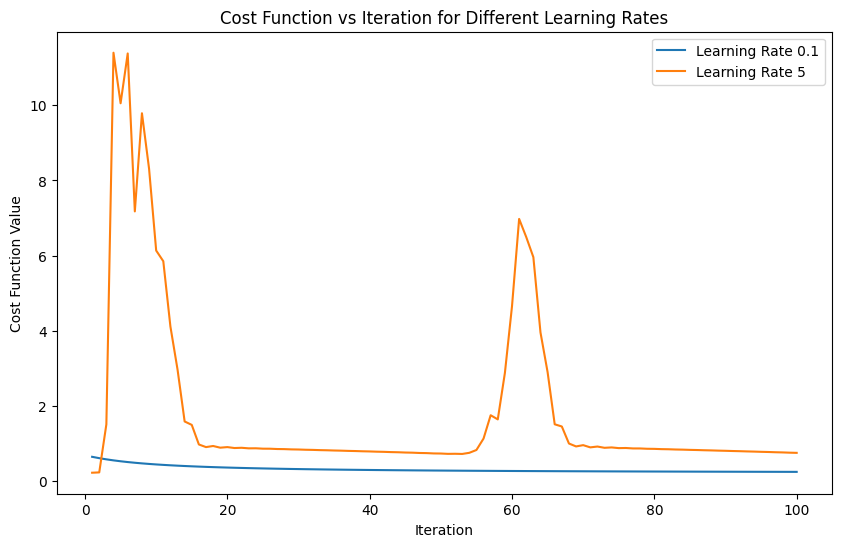

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('logisticX.csv')
y = pd.read_csv('logisticY.csv')

X = X.values
y = y.values.flatten()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

theta = np.zeros((X.shape[1] + 1, 1))
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = y.reshape(-1, 1)

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-10
    cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    costs = []
    for _ in range(num_iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs

alphas = [0.1, 5]
num_iterations = 100

theta_results = []
costs_results = []
for alpha in alphas:
    theta_initial = np.zeros((X.shape[1], 1))
    theta_final, costs = gradient_descent(X, y, theta_initial, alpha, num_iterations)
    theta_results.append(theta_final)
    costs_results.append(costs)

plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alphas):
    plt.plot(range(1, num_iterations + 1), costs_results[i], label=f'Learning Rate {alpha}')
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.legend()
plt.show()
